# Sesión 5 monitoría

## Merge y Concat en pandas

In [72]:
import pandas as pd
import numpy as np

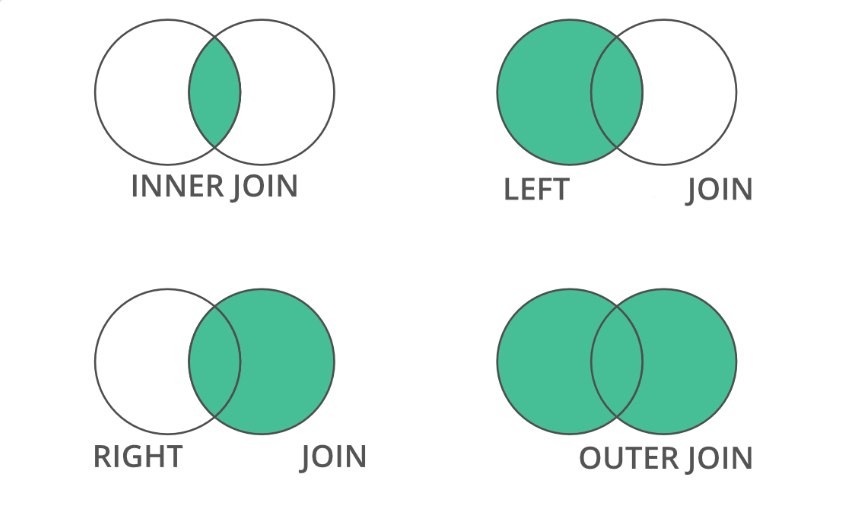

In [73]:
# ==== Datasets base ====
# Empleados y departamentos
empleados = pd.DataFrame({
    "empleado_id": [1, 2, 3, 4, 5, 5],
    "nombre": ["Ana", "Bruno", "Carla", "Diego", "Elena", "Elena_dup"],
    "dept_id": [10, 10, 20, 30, 30, 30]
})

departamentos = pd.DataFrame({
    "dept_id": [10, 20, 20, 40],
    "departamento": ["Ventas", "Finanzas", "Finanzas_dup", "TI"]
})

# Pedidos y clientes (para otras demostraciones)
clientes = pd.DataFrame({
    "cliente_id": [101, 102, 103],
    "cliente": ["ACME", "Globex", "Initech"]
})

pedidos = pd.DataFrame({
    "pedido_id": [1001, 1002, 1003, 1004],
    "cliente_id": [101, 101, 104, np.nan],
    "monto": [1200, 800, 500, 300]
})

# DataFrames con columnas distintas para concat
df_a = pd.DataFrame({"A": [1,2], "B": ["x","y"]})
df_b = pd.DataFrame({"B": ["y","z"], "C": [3,4]})

### Merge

In [74]:
#Desarrollo de la explicación

In [75]:
empleados

,empleado_id,nombre,dept_id
0,1,Ana,10
1,2,Bruno,10
2,3,Carla,20
3,4,Diego,30
4,5,Elena,30
5,5,Elena_dup,30


In [76]:
departamentos

,dept_id,departamento
0,10,Ventas
1,20,Finanzas
2,20,Finanzas_dup
3,40,TI


In [77]:
#Inner join
empleados.merge(departamentos, on='dept_id', how='inner')

,empleado_id,nombre,dept_id,departamento
0,1,Ana,10,Ventas
1,2,Bruno,10,Ventas
2,3,Carla,20,Finanzas
3,3,Carla,20,Finanzas_dup


In [78]:
#Left join
empleados.merge(departamentos, on='dept_id', how='left')

,empleado_id,nombre,dept_id,departamento
0,1,Ana,10,Ventas
1,2,Bruno,10,Ventas
2,3,Carla,20,Finanzas
3,3,Carla,20,Finanzas_dup
4,4,Diego,30,NaN
5,5,Elena,30,NaN
6,5,Elena_dup,30,NaN


In [79]:
#Right join
empleados.merge(departamentos, on='dept_id', how='right')

,empleado_id,nombre,dept_id,departamento
0,1.0,Ana,10,Ventas
1,2.0,Bruno,10,Ventas
2,3.0,Carla,20,Finanzas
3,3.0,Carla,20,Finanzas_dup
4,NaN,NaN,40,TI


In [80]:
#Outer join
empleados.merge(departamentos, on='dept_id', how='outer')

,empleado_id,nombre,dept_id,departamento
0,1.0,Ana,10,Ventas
1,2.0,Bruno,10,Ventas
2,3.0,Carla,20,Finanzas
3,3.0,Carla,20,Finanzas_dup
4,4.0,Diego,30,NaN
5,5.0,Elena,30,NaN
6,5.0,Elena_dup,30,NaN
7,NaN,NaN,40,TI


In [81]:
transacciones = pd.read_excel('Transacciones_1000.xlsx')
topes=pd.read_excel('Topes.xlsx')

In [82]:
transacciones

,Id,Nombre persona,Transacción,Fecha
0,9,Ana,37470,2025-03-10
1,8,Valeria,5338,2025-02-13
2,8,Marta,37307,2025-02-06
3,3,Luis,38381,2025-01-05
4,7,Lucía,38235,2025-02-04
...,...,...,...,...
995,6,Marta,47379,2025-03-28
996,4,Marta,18437,2025-02-25
997,2,Andrés,22286,2025-01-24
998,7,Sofía,28205,2025-01-25


In [83]:
topes

,Id,Nombre persona,Tope transacciones
0,1,Ana,18428
1,2,Luis,31790
2,3,Carlos,1000000000
3,4,Marta,100000000
4,5,Sofía,20023
5,6,Pedro,43275
6,7,Lucía,58046
7,8,Andrés,18863
8,9,Valeria,56269
9,10,Jorge,38800


In [84]:
transacciones['Mes']=transacciones['Fecha'].dt.month
transacciones_limpio=transacciones[['Nombre persona','Transacción','Mes']]

transacciones_limpio

,Nombre persona,Transacción,Mes
0,Ana,37470,3
1,Valeria,5338,2
2,Marta,37307,2
3,Luis,38381,1
4,Lucía,38235,2
...,...,...,...
995,Marta,47379,3
996,Marta,18437,2
997,Andrés,22286,1
998,Sofía,28205,1


In [85]:
transacciones_agrupadas=transacciones_limpio.groupby(['Nombre persona','Mes']).sum()
transacciones_agrupadas

Transacción
Nombre persona Mes             
Ana            1         970492
               2         935978
               3        1039410
Andrés         1        1145032
               2        1216271
               3         955111
Carlos         1         900288
               2         849966
               3        1026586
Jorge          1         831098
               2         829287
               3        1063970
Lucía          1         829587
               2         977576
               3         921545
Luis           1        1131956
               2         733495
               3         652478
Marta          1         951617
               2        1005242
               3        1175319
Pedro          1         572716
               2         563818
               3         914550
Sofía          1        1057849
               2         833708
               3         855653
Valeria        1        1264454
               2         754204
               3        1027708

In [86]:
#Solución al problema

transacciones_y_topes=transacciones_agrupadas.merge(topes,on='Nombre persona', how='left')
transacciones_y_topes['¿Salió del tope?']=transacciones_y_topes['Tope transacciones']<transacciones_y_topes['Transacción']
transacciones_y_topes

,Nombre persona,Transacción,Id,Tope transacciones,¿Salió del tope?
0,Ana,970492,1,18428,True
1,Ana,935978,1,18428,True
2,Ana,1039410,1,18428,True
3,Andrés,1145032,8,18863,True
4,Andrés,1216271,8,18863,True
5,Andrés,955111,8,18863,True
6,Carlos,900288,3,1000000000,False
7,Carlos,849966,3,1000000000,False
8,Carlos,1026586,3,1000000000,False
9,Jorge,831098,10,38800,True


### Concatenar

In [87]:
df_a

,A,B
0,1,x
1,2,y


In [88]:
df_b

,B,C
0,y,3
1,z,4


In [89]:
#Concatenar
pd.concat([df_a,df_b])

,A,B,C
0,1.0,x,NaN
1,2.0,y,NaN
0,NaN,y,3.0
1,NaN,z,4.0


In [90]:
pd.concat([df_a,df_b], join='inner')

,B
0,x
1,y
0,y
1,z


## Obtener datos de APIs abiertas

### Datos de la bolsa: alphavantage

In [56]:
import requests

url = "https://www.alphavantage.co/query"
params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "MSFT",
    "apikey": ""
}

r = requests.get(url, params=params).json()

df = pd.DataFrame(r["Time Series (Daily)"]).T
df.columns = ["open", "high", "low", "close", "volume"]
df.index = pd.to_datetime(df.index)
df


,open,high,low,close,volume
2025-08-27,502.0000,507.2900,499.9000,506.7400,17153950
2025-08-26,504.3550,504.9778,498.5100,502.0400,30835709
2025-08-25,506.6300,508.1900,504.1200,504.2600,21638579
2025-08-22,504.2500,510.7300,502.4100,507.2300,24324161
2025-08-21,503.6900,507.6300,502.7201,504.2400,18443254
...,...,...,...,...,...
2025-04-10,382.0600,383.9000,367.8000,381.3500,38024368
2025-04-09,353.5350,393.2250,353.1000,390.4900,50199696
2025-04-08,368.2550,373.6500,350.2500,354.5600,35868918
2025-04-07,350.8800,370.9999,344.7900,357.8600,50424998


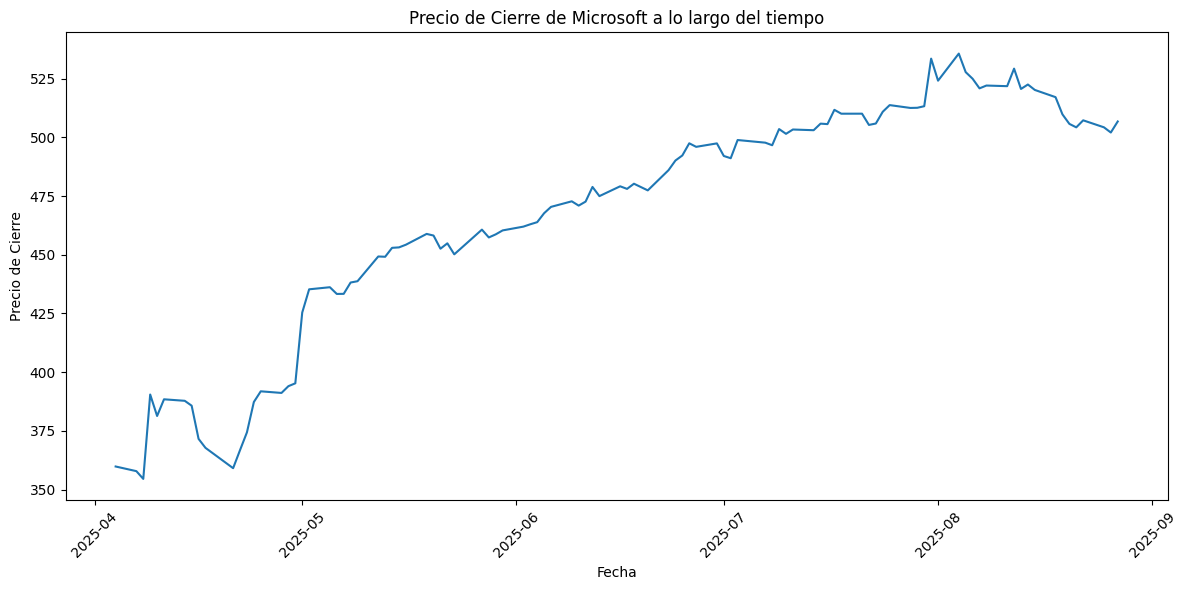

In [57]:
import matplotlib.pyplot as plt

df.index = pd.to_datetime(df.index)

# Convertir columnas numéricas
df = df.astype(float)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'])
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title(f'Precio de Cierre de Microsoft a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Datos abiertos Colombia

In [20]:
!pip install sodapy

In [59]:
import pandas as pd
from sodapy import Socrata

client = Socrata("www.datos.gov.co", None)


results = client.get("68qj-5xux", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,point,nombre_peaje,ubicaci_n,sector,sentido,poste_de_referencia_pr,distancia_pr,telefono_gr_a,telefono_peaje,url_foto,...,administrador,c_digo_peaje,c_digo_tramo,eje_adicional,eje_adicional_r,eje_grua,latitud,longitud,responsable,territorial
0,"{'type': 'Point', 'coordinates': [-76.32849669...",RÍO FRÍO,Mediacanoa - Ansermanuevo,Mediacanoa - Roldanillo,Norte – Sur / Sur - Norte,13,600,Por Definir,3102454252,{'url': 'https://hermes.invias.gov.co/recursos...,...,1,4,2302,12500,12100,9100,3.99550925,-76.3284967,INVIAS,25
1,"{'type': 'Point', 'coordinates': [-75.77560327...",SAN CLEMENTE,Vía Cauyá - El Palo,Cauyá - La Felisa,Ambos sentidos de circulación,17,150,Por Definir,3102454264,{'url': 'https://hermes.invias.gov.co/recursos...,...,1,21,2508,12500,12100,9100,5.3324384899999995,-75.77560328,INVIAS,5
2,"{'type': 'Point', 'coordinates': [-72.99948186...",LOS CUROS,Aratoca - Bucaramanga,San Gil - Bucaramanga,Aplica en ambos sentidos,53,730,Por Definir,Por Definir,{'url': 'https://hermes.invias.gov.co/recursos...,...,1,85,45A07,14300,14000,9800,6.8256343699999995,-72.99948187,INVIAS,22
3,"{'type': 'Point', 'coordinates': [-73.91282774...",CASABLANCA,Cogua – Tausa Km 40+000,Bogotá - Ubaté,Sur – Norte // Norte – Sur,40,0,Por Definir,Por Definir,{'url': 'https://hermes.invias.gov.co/recursos...,...,1,81,45A04,14300,14000,9800,5.104394190000001,-73.91282774,INVIAS,12
4,"{'type': 'Point', 'coordinates': [-73.50115777...",SÁCHICA,Vía Chiquinquirá Tunja km 42+800 Jurisdicción ...,Sáchica - Tunja,Ambos sentidos de circulación,50,200,Por Definir,3102455356,{'url': 'https://hermes.invias.gov.co/recursos...,...,1,113,6008,12500,12100,9100,5.55768488,-73.50115778,INVIAS,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,"{'type': 'Point', 'coordinates': [-73.66972199...",PAILITAS,Km 28+500 Vía La Mata – San Roque,La Mata - San Roque,Norte – Sur – Norte,28,600,NaN,3165280395,{'url': 'https://hermes.invias.gov.co/recursos...,...,2,75,4515,11000,10800,7800,8.85280385,8.85280385,INVÍAS,9
177,"{'type': 'Point', 'coordinates': [-73.63943499...",LA LOMA,Km 42 Vía San Roque - Bosconia,San Roque - Bosconia,Sur – Norte,40,1927,018000945566 Opción 1,3158210547,{'url': 'http://hermes.invias.gov.co/carretera...,...,2,76,4516,9000,8700,6500,9.63801652,9.63801652,Concesión Yuma,9
178,"{'type': 'Point', 'coordinates': [-73.54651899...",LA GÓMEZ,Vía La Lizama – San Alberto Km 37 + 300,Cruce Ruta 45 (La Fortuna) - Lebrija,Sur – Norte,37,300,Por Definir,Por Definir,{'url': 'https://hermes.invias.gov.co/recursos...,...,2,126,6602,11000,10800,7800,7.39717597,7.39717597,INVIAS,22
179,"{'type': 'Point', 'coordinates': [-72.30502163...",ARANGUANEY (NO OPERATIVO),Via Sogamoso Yopal Km 8+900 Jurisdiccion Soga...,Sogamoso - El Crucero,Bidireccional,16,800,Por Definir,Por Definir,NaN,...,1,NaN,6513,0,0,2400,5.41098873,5.41098873,INVÍAS,7


In [65]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

results_dolar = client.get("mcec-87by", limit=2000)

# Convert to pandas DataFrame
dolar_df = pd.DataFrame.from_records(results_dolar)
dolar_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   valor          2000 non-null   object
 1   unidad         2000 non-null   object
 2   vigenciadesde  2000 non-null   object
 3   vigenciahasta  2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


In [67]:
dolar_df['vigenciadesde']=pd.to_datetime(dolar_df['vigenciadesde'])
dolar_df['valor']=dolar_df['valor'].astype(float)
dolar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   valor          2000 non-null   float64       
 1   unidad         2000 non-null   object        
 2   vigenciadesde  2000 non-null   datetime64[ns]
 3   vigenciahasta  2000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 62.6+ KB


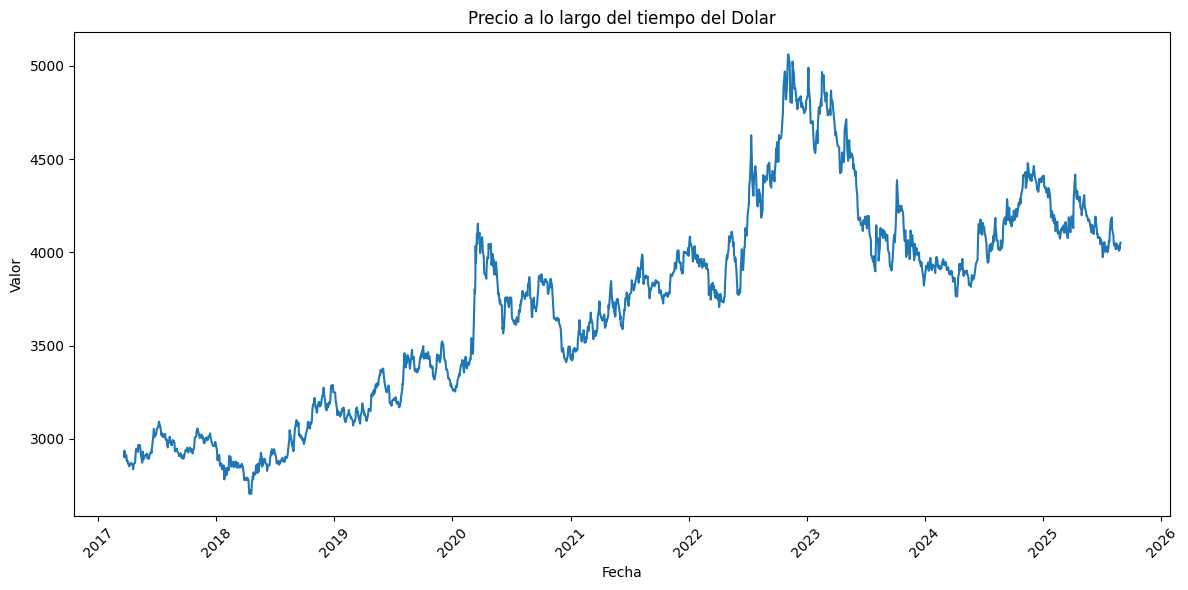

In [68]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(dolar_df['vigenciadesde'], dolar_df['valor'])
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title(f'Precio a lo largo del tiempo del Dolar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Datos meteorológicos

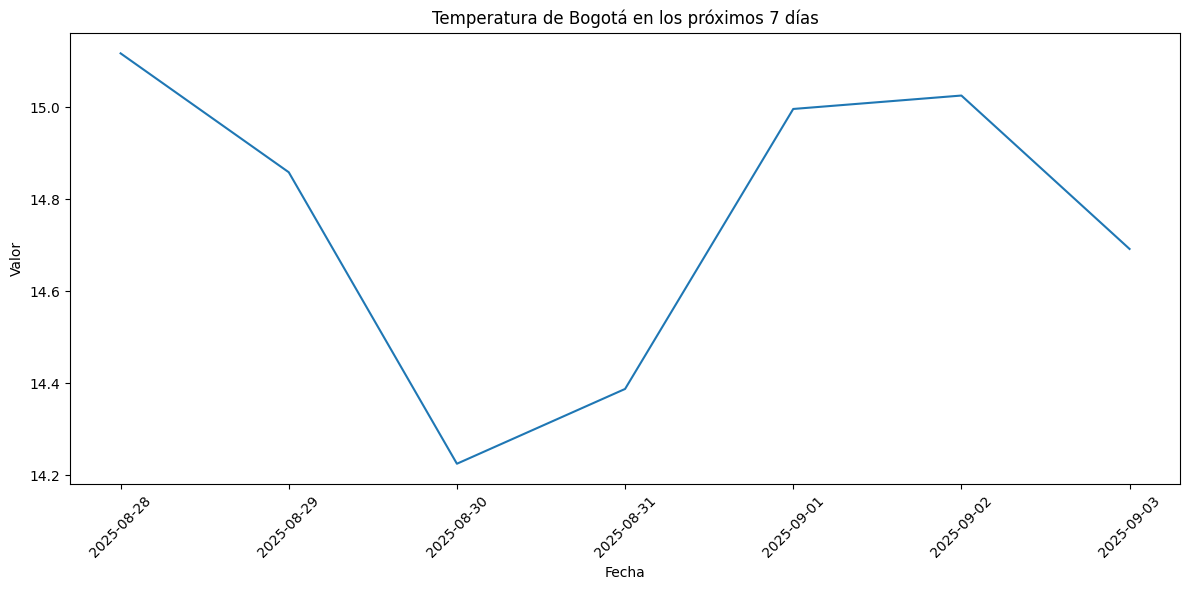

In [109]:
# Coordenadas de Bogotá, Colombia
lat = 4.7110
lon = -74.0721

# API Open-Meteo
url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m,relative_humidity_2m,precipitation"

data = requests.get(url).json()

# Crear DataFrame con las variables horarias
df = pd.DataFrame({
    "time": data["hourly"]["time"],
    "temperature_2m": data["hourly"]["temperature_2m"],
    "relative_humidity_2m": data["hourly"]["relative_humidity_2m"],
    "precipitation": data["hourly"]["precipitation"]
})

df['time']=pd.to_datetime(df['time']).dt.date
df_agregado=df.groupby('time').agg({'temperature_2m': 'mean', 'relative_humidity_2m': 'mean', 'precipitation': 'sum'})
df_agregado

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_agregado.index, df_agregado['temperature_2m'])
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title(f'Temperatura de Bogotá en los próximos 7 días')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Interactuar con ChatGPT desde Python

In [98]:
!pip install openai

In [99]:
chat_gpt_key='' #Esta es la key que se genera en OpenAI platform después de registrarse y poner el método de pago

In [112]:
from openai import OpenAI

# Inicializa el cliente
client = OpenAI(api_key=chat_gpt_key)

prompt = "¿Quién es el presidente de Brasil?"

# Llamada al modelo
response = client.chat.completions.create(
    model="gpt-5",
    messages=[{"role": "user", "content": prompt}],
    temperature=1
)

# Extraer contenido
mensaje = response.choices[0].message.content
print(mensaje)

Luiz Inácio Lula da Silva, en el cargo desde el 1 de enero de 2023.
